In [2]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from neo_tracklet_classifier import directory, plots
from matplotlib import rcParams
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)
# np.set_printoptions(suppress=True) #dont use scientific notation


print('Tensorflow version ', tf.__version__)
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))


Tensorflow version  2.10.0
Num GPUs Available:  1


### Show the history and results for the raw dataset

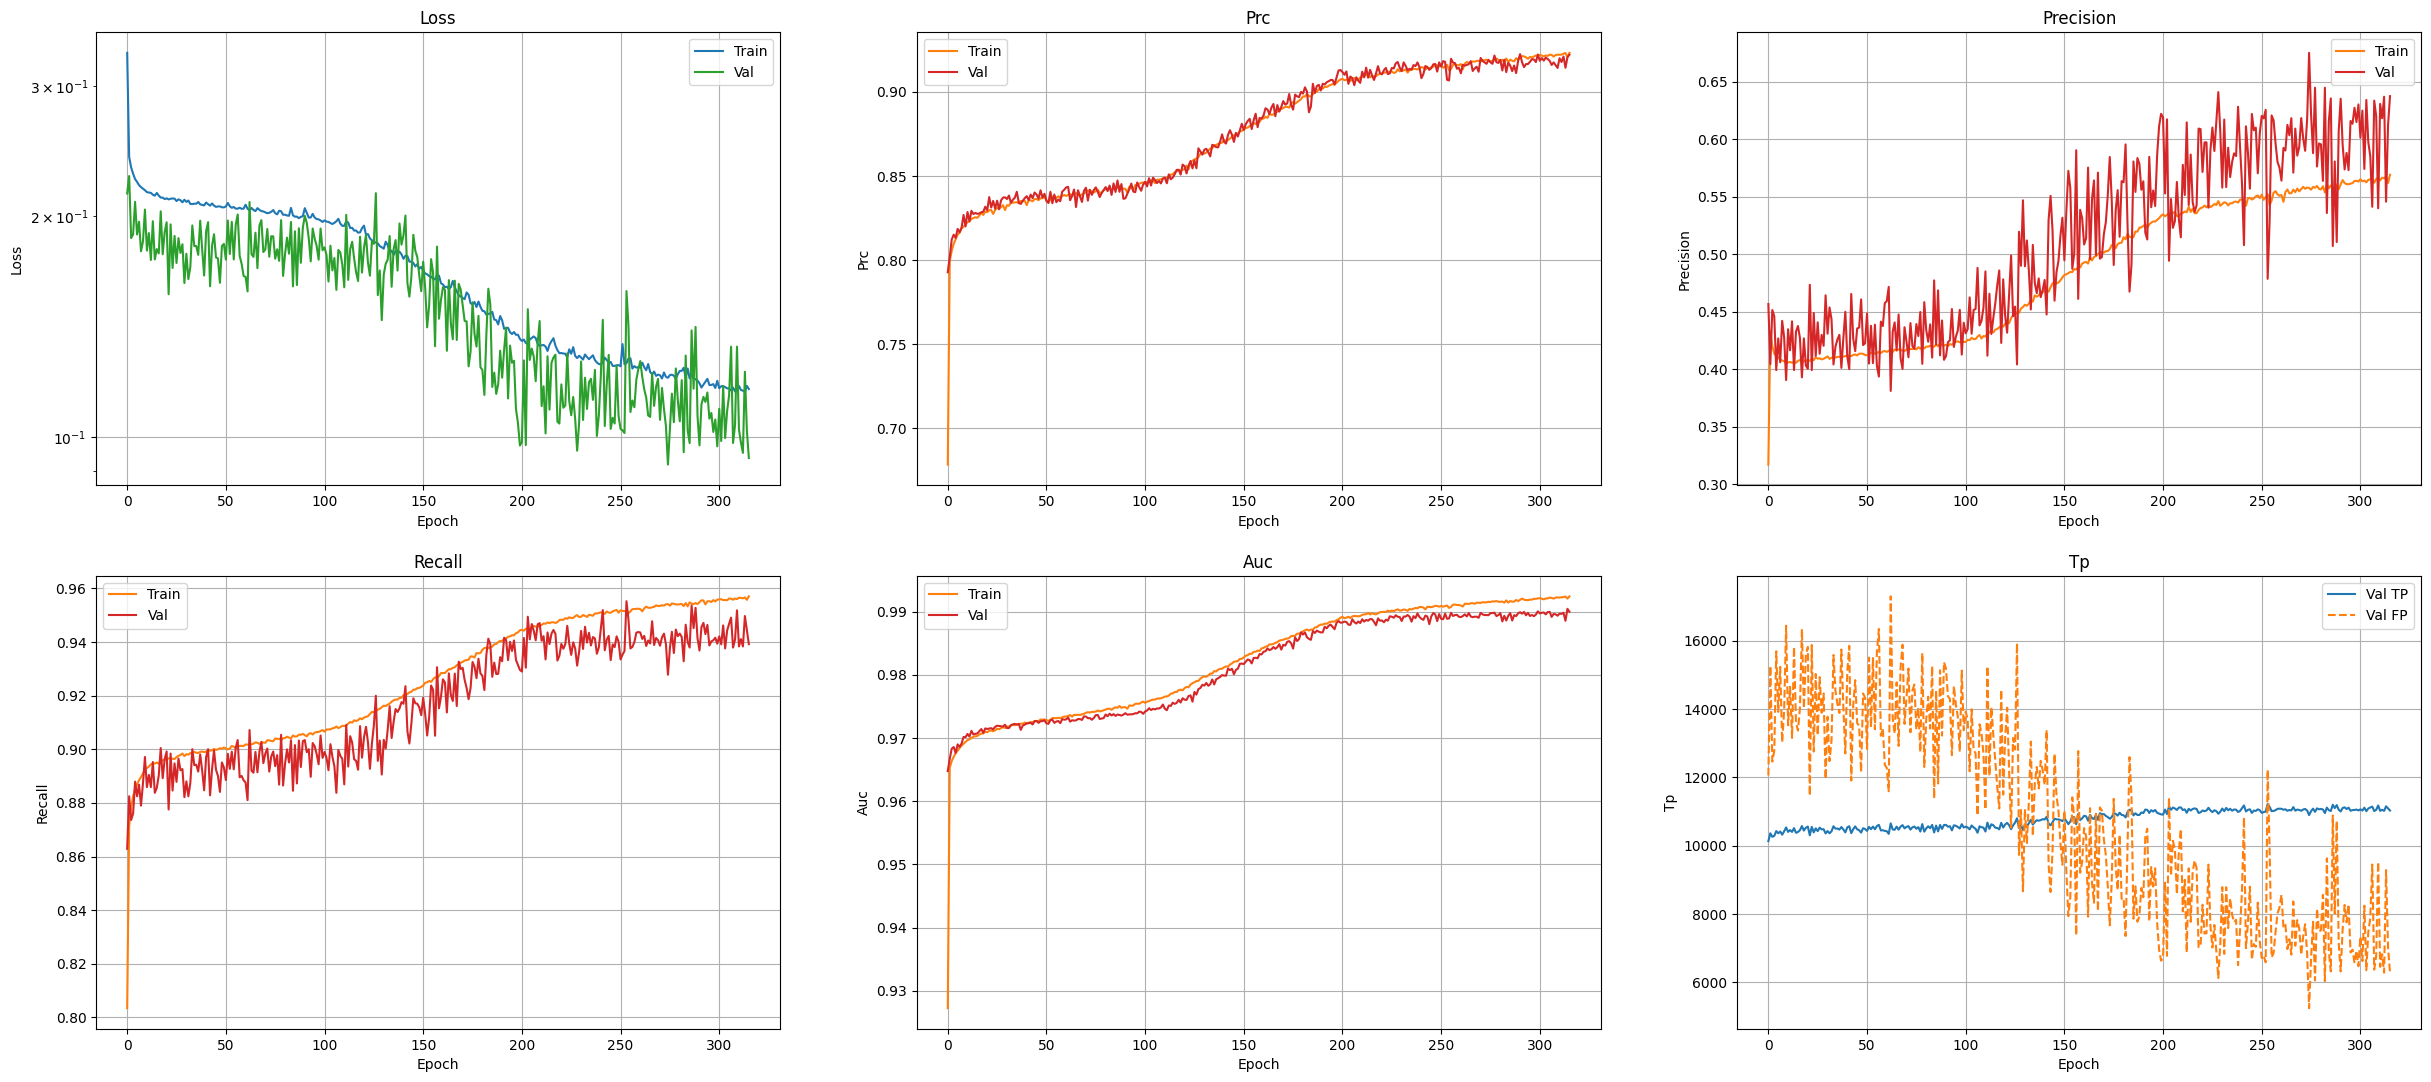

NEOs Found (True Positives): 94.11%
NEOs Missed (False Positives): 5.89%
Non-NEOs Identified (True Negatives): 97.54%
Non-NEOs Incorrectly Identified (False Negatives): 2.46%


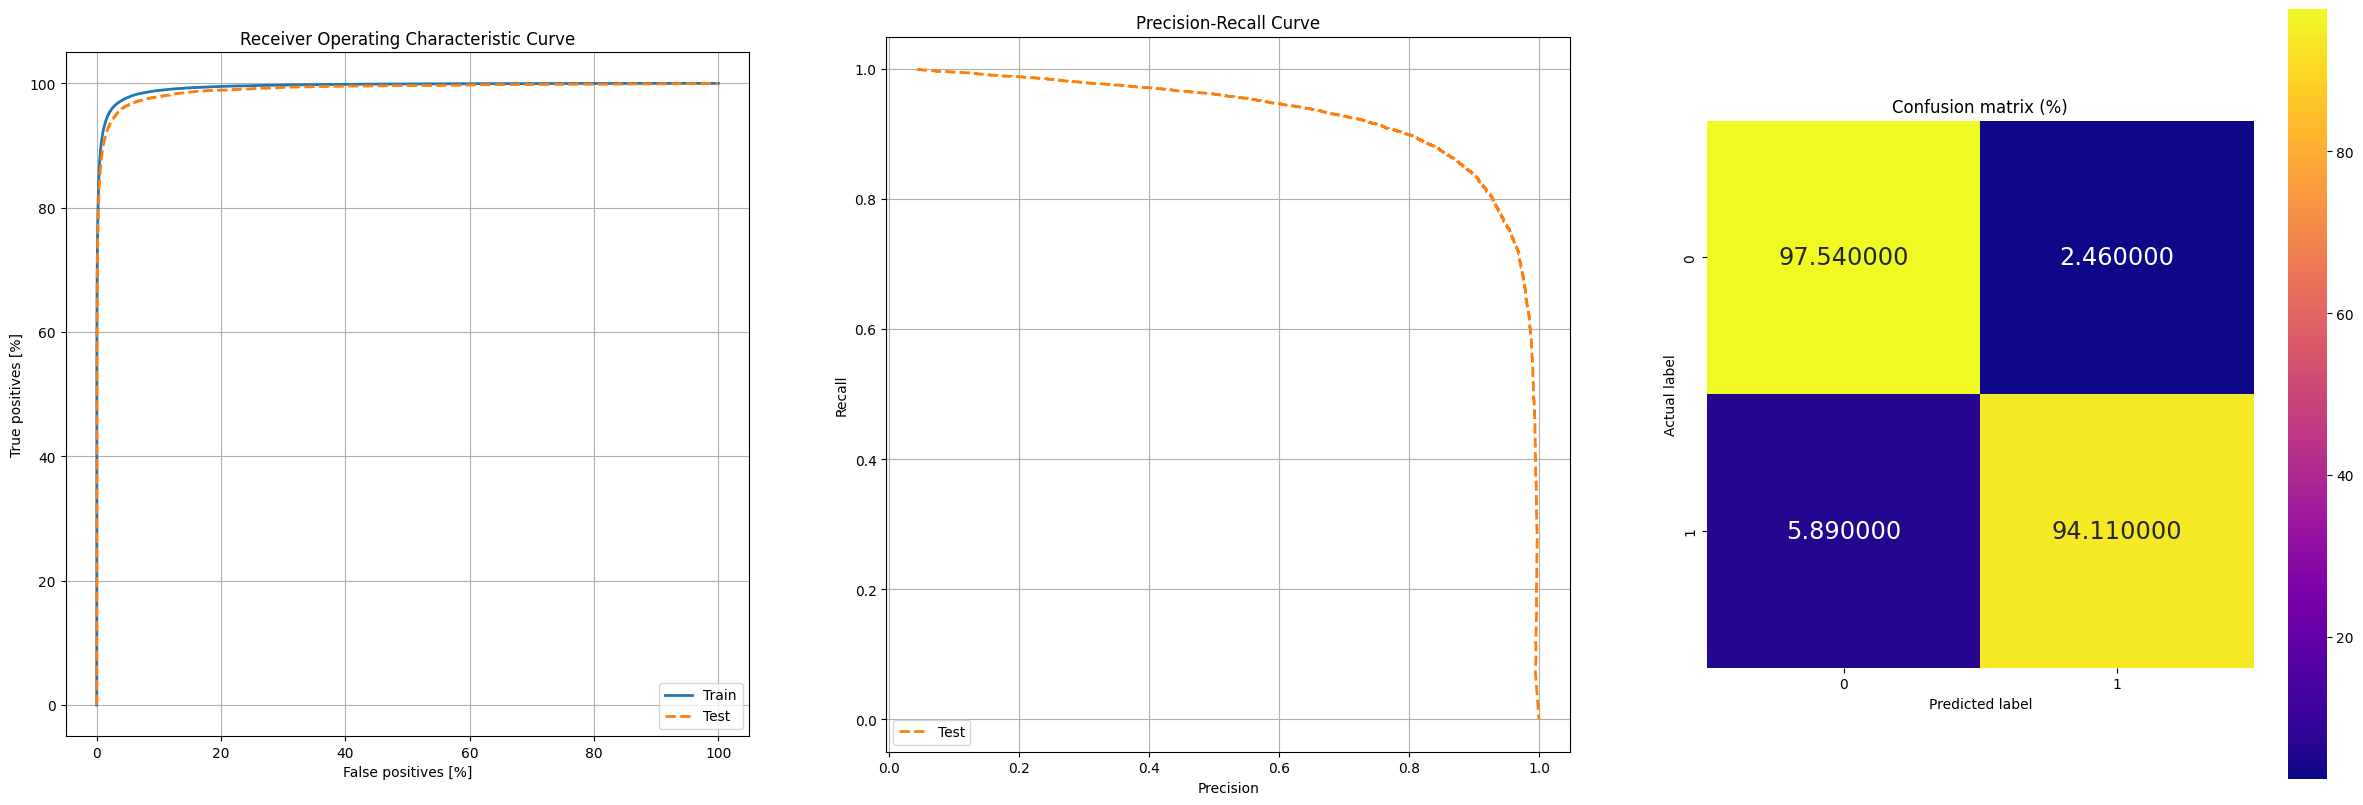

In [3]:
filename = '2048_1024'

falsepositives_filename = 'generic'

history_path = os.path.join(directory.data_dir, 'history_'+filename+'.npy')
history = np.load(history_path, allow_pickle=True).tolist()
history.items()

results_path = os.path.join(directory.data_dir, 'results_'+filename+'.npy')
results = np.load(results_path, allow_pickle=True).tolist()
results.items()

rcParams['figure.figsize'] = (30, 20)
plots.plot_metrics(history)
# plots.plot_metrics(history1, 1)
plt.show()
rcParams['figure.figsize'] = (30, 10)
plots.results(results)
plt.show()


### Plot False Positives

In [ ]:
predictions = pd.DataFrame(results['predictions'])
fp = predictions[predictions['fp'] == 1]

display(fp[fp['mu_ra_0'].between(-0.05, 0.05, inclusive=False)])
fp_path = os.path.join(directory.data_dir, falsepositives_filename+'.csv')
fp.to_csv(fp_path, index=False)

In [4]:
fig = px.scatter(fp, x=range(0,len(fp['mu_ra_0'])), y='mu_ra_0')
fig.show()

mu_dec_0 is zero or very small

In [5]:
fig = px.scatter(fp, x=range(0,len(fp['mu_ra_0'])), y='mu_dec_1')
fig.show()

In [6]:
fig = px.scatter(fp, x=range(0,len(fp['mu_ra_0'])), y='mu_sq_0')
fig.show()

In [7]:
fig = px.scatter(fp, x=range(0,len(fp['mu_ra_0'])), y='M_0')
fig.show()

In [8]:
fig = px.scatter(fp, x='mu_ra_0', y='mu_dec_0', log_x=True, log_y=True)
fig.show()

In [9]:
fig = px.scatter(fp, x='mu_ra_0', y='mu_sq_0', log_x=True, log_y=True)
fig.show()

In [10]:
fig = px.scatter(fp, x='mu_sq_0', y='mu_sq_1', log_x=True, log_y=True)
fig.show()

In [11]:
fig = px.scatter(fp, x='mu_sq_1', y='mu_sq_2', log_x=True, log_y=True)
fig.show()